Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe named "data" from the given datafile and print it's head

In [2]:
data = pd.read_csv(r'C:\Users\HP\python_datasets\datasets_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
(1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Check if there are missing values. If yes, handle them.

In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

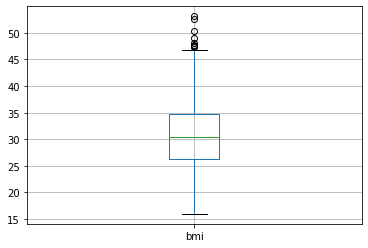

In [5]:
data.boxplot(column=['bmi'])

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

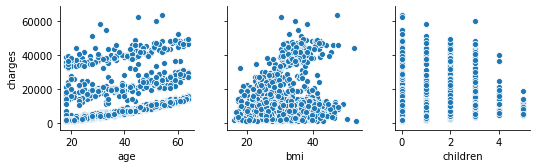

In [6]:
sns.pairplot(data, x_vars=["age","bmi","children"], y_vars="charges",kind="scatter")

Create X and Y

In [7]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = data['charges']

Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

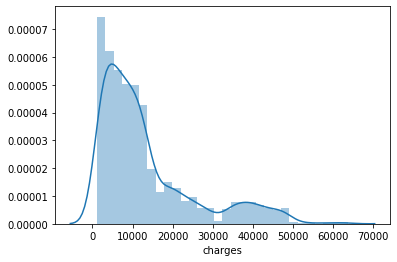

In [8]:
sns.distplot(Y, hist=True)

In [9]:
Y_log = np.log(Y)

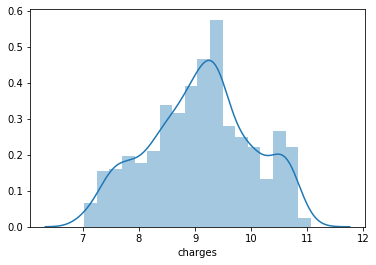

In [10]:
sns.distplot(Y_log, hist=True) 

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of map function. Refer to clustering code file.<br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data[['sex_','smoker_','region_']] = data[['sex','smoker','region']].apply(le.fit_transform)

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_,smoker_,region_
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [14]:
data = data.drop(['sex','smoker','region'],axis=1)
data.head()

,age,bmi,children,charges,sex_,smoker_,region_
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [15]:
data['charges_y'] = Y_log
data.head()

,age,bmi,children,charges,sex_,smoker_,region_,charges_y
0,19,27.900,0,16884.92400,0,1,3,9.734176
1,18,33.770,1,1725.55230,1,0,2,7.453302
2,28,33.000,3,4449.46200,1,0,2,8.400538
3,33,22.705,0,21984.47061,1,0,1,9.998092
4,32,28.880,0,3866.85520,1,0,1,8.260197


In [16]:
data = data.drop('charges',axis=1)
data.head()

,age,bmi,children,sex_,smoker_,region_,charges_y
0,19,27.900,0,0,1,3,9.734176
1,18,33.770,1,1,0,2,7.453302
2,28,33.000,3,1,0,2,8.400538
3,33,22.705,0,1,0,1,9.998092
4,32,28.880,0,1,0,1,8.260197


In [17]:
X = data[['age', 'bmi', 'children', 'sex_', 'smoker_', 'region_']]
Y = data['charges_y']

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B983D907C8>,
      dtype=object)

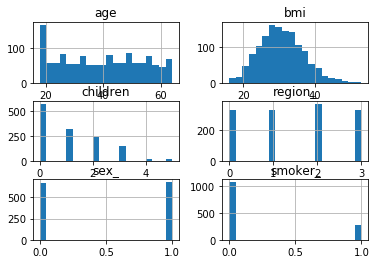

In [18]:
X.hist(bins=20)

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

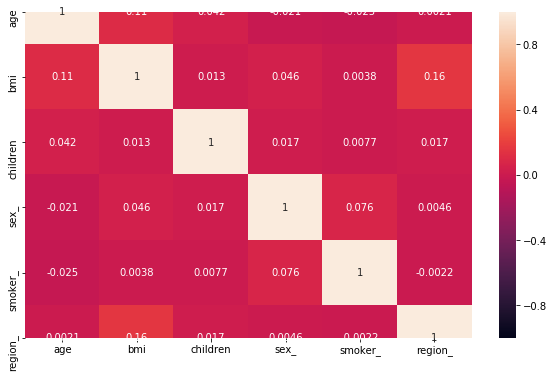

In [19]:
plt.figure(figsize=(10,6))
corr_df = X.corr(method='pearson')
sns.heatmap(corr_df, vmax=1.0, vmin=-1.0, annot=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df['features'] = X.columns
vif_df['VIF factor'] = [vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF factor
0,age,7.55
1,bmi,10.37
2,children,1.80
3,sex_,2.00
4,smoker_,1.26
5,region_,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [32]:
X = data[['age', 'bmi', 'children', 'sex_', 'smoker_', 'region_']]
y = data['charges_y']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Build a base Linear Regression model using sklearn.

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

7.0424464024156395
[ 0.0352433   0.0111782   0.09942699 -0.07018148  1.56899189 -0.04278656]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [24]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['column'])
cdf

,column
age,0.035243
bmi,0.011178
children,0.099427
sex_,-0.070181
smoker_,1.568992
region_,-0.042787


Predict using the model.

In [25]:
predictions = lm.predict(X_test)
predictions

array([ 8.91202609,  8.56894447,  9.43739803,  9.38706377,  8.31268401,
        8.94047096,  9.2415172 ,  9.63018096,  8.97448562, 10.54982113,
        8.13392381,  8.28053661,  8.7786953 ,  9.15631579,  9.23496085,
        9.38292582,  8.31732968,  9.80740634,  9.19175848, 10.22271157,
       10.54182548,  8.06219616,  7.97098006,  8.78589234,  8.43887365,
        9.42945103,  9.00817552,  9.4410749 ,  8.41156082, 10.20315578,
        7.73485623, 10.38083015,  8.89817667,  8.96925349,  8.44345347,
        8.87370581,  9.45013244,  9.08679667,  9.11044688,  8.89974701,
        9.58911775,  9.17403231,  8.55726326,  9.00093224,  7.98094222,
        8.82916407,  8.94263662, 10.62857798,  9.3277211 ,  9.2600054 ,
        9.9993291 ,  8.31379578,  8.90598596,  9.64115791,  9.10502318,
        9.38942878,  9.3185899 ,  8.62910173,  8.7102396 , 10.70357012,
        7.89124122, 10.62483464, 11.0905674 ,  7.9620672 , 10.01160997,
        8.87003354,  8.48277172,  8.91524868,  8.87161932,  8.93

Evaluate the model.

In [26]:
from sklearn.metrics import r2_score

In [27]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(r2_score(y_test, predictions))

0.2773235344428167
0.2057227028675769
0.4535666465554725
0.7374526728907583


In [28]:
new_df = pd.DataFrame()
new_df = X_test
new_df['Actual Sales'] = y_test
new_df['Predicted_sales'] = predictions
new_df

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,bmi,children,sex_,smoker_,region_,Actual Sales,Predicted_sales
7,37,27.740,3,0,0,1,8.893093,8.912026
999,36,26.885,0,0,0,1,8.569372,8.568944
1209,59,37.100,1,1,0,3,9.421182,9.437398
491,61,25.080,0,0,0,2,10.106963,9.387064
625,29,26.030,0,0,0,1,8.225895,8.312684
...,...,...,...,...,...,...,...,...
854,49,23.845,3,0,1,0,10.090254,10.903185
554,25,41.325,0,0,0,0,9.791377,8.385468
1278,39,29.925,1,1,1,0,10.019582,10.349680
374,20,33.330,0,1,0,2,7.238158,7.964127


In [29]:
new_df['deviation'] = new_df['Actual Sales'] - new_df['Predicted_sales']
new_df.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,bmi,children,sex_,smoker_,region_,Actual Sales,Predicted_sales,deviation
7,37,27.740,3,0,0,1,8.893093,8.912026,-0.018933
999,36,26.885,0,0,0,1,8.569372,8.568944,0.000427
1209,59,37.100,1,1,0,3,9.421182,9.437398,-0.016216
491,61,25.080,0,0,0,2,10.106963,9.387064,0.719899
625,29,26.030,0,0,0,1,8.225895,8.312684,-0.086789


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [34]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_) 

7.044356761111713
[ 0.03524083  0.01118039  0.09925573 -0.06922454  1.55870554 -0.04282443]


In [35]:
pred = lm.predict(X_test)
print(metrics.mean_absolute_error(y_test, pred))
print(metrics.mean_squared_error(y_test, pred))
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

0.27751328883577786
0.20553766835291548
0.45336262346262673
0.7376888175484464


In [36]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

7.8888757936390075
[ 0.03086241  0.          0.          0.          0.         -0.        ]


In [37]:
pre = lm.predict(X_test)
print(metrics.mean_absolute_error(y_test, pre))
print(metrics.mean_squared_error(y_test, pre))
print(np.sqrt(metrics.mean_squared_error(y_test, pre)))
print(r2_score(y_test, pre))

0.618132713042502
0.6007662473721023
0.7750911219799271
0.23329039397987605


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [38]:
new_df = pd.DataFrame()
new_df = X_train

new_df['sales'] = y_train
new_df.shape

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(936, 7)

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

In [39]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='charges_y ~ age + bmi + children + sex_ + smoker_  + region_',data=data).fit()

In [40]:
print(lm_model.params)
print(lm_model.summary()) 

Intercept    7.044016
age          0.034656
bmi          0.012283
children     0.102395
sex_        -0.075341
smoker_      1.549838
region_     -0.047607
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              charges_y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     730.2
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:40:31   Log-Likelihood:                -811.26
No. Observations:                1338   AIC:                             1637.
Df Residuals:                    1331   BIC:                             1673.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

Predict using the model. Evaluate the model.

In [41]:
Y_pred_new = lm_model.predict(X_test)

In [42]:
from sklearn.metrics import r2_score
print(metrics.mean_absolute_error(y_test, Y_pred_new))
print(metrics.mean_squared_error(y_test, Y_pred_new))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_new)))
print(r2_score(y_test, Y_pred_new))

0.2812924501705578
0.2046219023398206
0.4523515251879014
0.7388575360012187


Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

In [43]:
new_df['model_fitted_y'] = lm_model.fittedvalues

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Residuals')

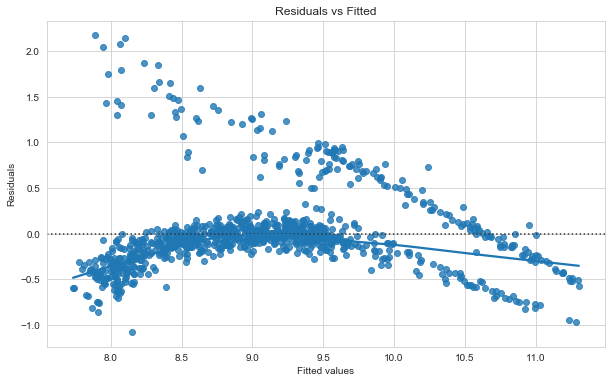

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.residplot(x='model_fitted_y', y='sales', data=new_df, lowess=True)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

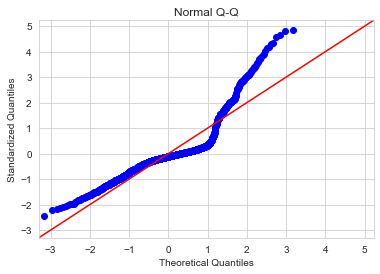

In [45]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Quantiles')
plt.show()

Check for Assumption 8-Errors should folllow constant variance.<br>
Hint: Diagnostic plot

In [46]:
model_fitted_y = lm_model.fittedvalues

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

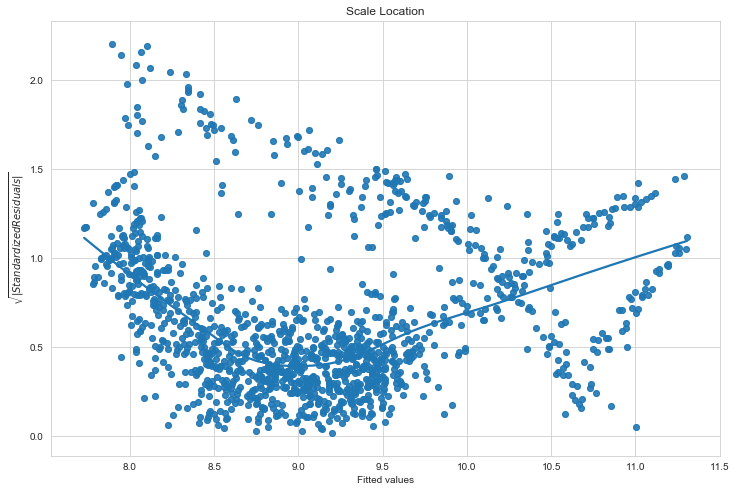

In [47]:
#noemalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
#absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)
plt.title('Scale Location')
plt.xlabel('Fitted values')
plt.ylabel('$\sqrt{|Standardized Residuals|}$')

Scale the data using Standard Scaler to prepare it for SGD.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X = scaler.fit_transform(X)

Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [54]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

Build the SGDRegressor.

In [55]:
from sklearn.linear_model import SGDRegressor
lm = SGDRegressor(learning_rate='constant',eta0=0.01,random_state=10,max_iter=100)

In [56]:
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

[9.11028129]
[ 0.48955006  0.07317849  0.1113616  -0.03004348  0.58779397 -0.06278762]


Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

In [57]:
Y_pred_new = lm.predict(X_test)

Write down your conclusion as to which is the final model that you would go with along with the reasons.

In [58]:
print(metrics.mean_absolute_error(y_test, Y_pred_new))
print(metrics.mean_squared_error(y_test, Y_pred_new))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_new)))
print(r2_score(y_test, Y_pred_new))

0.3021726900195443
0.2348118783855398
0.48457391426441826
0.7093590255809907


Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [60]:
X_test_sample = pd.DataFrame({"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]})

In [62]:
X_test_sample

,age,sex,bmi,children,smoker,region
0,56,1,19.950,0,1,0
1,51,0,18.050,0,0,1
2,31,1,34.390,3,1,1
3,64,1,25.600,2,0,3
4,44,0,23.980,2,0,2
5,43,1,32.600,2,0,3
6,56,1,33.725,0,0,1


The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [64]:
y_predicted = lm.predict(X_test_sample)
y_predicted

array([39.40772122, 36.02462379, 28.62411313, 43.117071  , 33.13527308,
       33.6160509 , 40.29114571])

In [65]:
y_predicted = np.exp(y_predicted)
y_predicted

array([1.30183479e+17, 4.41870823e+15, 2.69956869e+12, 5.31503356e+18,
       2.45734568e+14, 3.97434356e+14, 3.14935958e+17])

Save the predicted values along with the observations into an excel file.

In [66]:
X_test_sample['y_predicted'] = y_predicted
X_test_sample.head() 

,age,sex,bmi,children,smoker,region,y_predicted
0,56,1,19.95,0,1,0,1.301835e+17
1,51,0,18.05,0,0,1,4.418708e+15
2,31,1,34.39,3,1,1,2.699569e+12
3,64,1,25.60,2,0,3,5.315034e+18
4,44,0,23.98,2,0,2,2.457346e+14


In [68]:
X_test_sample.to_excel('sample_data.xlsx')